### setup

In [4]:
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

In [5]:
filenames = glob.glob('*.csv')
filenames

['cb-2014-08.csv', 'cb-2015-08.csv', 'cb-2016-08.csv', 'cb-2017-08.csv']

In [6]:
# Loop through file names and read the data
dfs = []
for file in filenames:
    print('Reading ' + file)
    dfs.append(pd.read_csv(file))

Reading cb-2014-08.csv
Reading cb-2015-08.csv
Reading cb-2016-08.csv
Reading cb-2017-08.csv


In [7]:
dfs[2].head() # Check 

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,288,8/1/16 00:01,8/1/16 00:06,302,Avenue D & E 3 St,40.720828,-73.977932,428,E 3 St & 1 Ave,40.724677,-73.987834,16920,Subscriber,1961.0,1
1,457,8/1/16 00:01,8/1/16 00:09,285,Broadway & E 14 St,40.734546,-73.990741,432,E 7 St & Avenue A,40.726218,-73.983799,20084,Subscriber,1989.0,2
2,278,8/1/16 00:02,8/1/16 00:06,539,Metropolitan Ave & Bedford Ave,40.715348,-73.960241,3096,Union Ave & N 12 St,40.719240,-73.952420,18380,Subscriber,1971.0,1
3,862,8/1/16 00:02,8/1/16 00:16,280,E 10 St & 5 Ave,40.733320,-73.995101,280,E 10 St & 5 Ave,40.733320,-73.995101,24101,Subscriber,1995.0,1
4,407,8/1/16 00:02,8/1/16 00:09,161,LaGuardia Pl & W 3 St,40.729170,-73.998102,428,E 3 St & 1 Ave,40.724677,-73.987834,18949,Subscriber,1993.0,1


In [8]:
for i in range(4):
    print('Converting set ', i+1)
    dfs[i]['starttime'] = pd.to_datetime(dfs[i]['starttime'])
    dfs[i]['stoptime'] = pd.to_datetime(dfs[i]['stoptime'])

Converting set  1
Converting set  2
Converting set  3
Converting set  4


In [9]:
df = pd.concat(dfs)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5007606 entries, 0 to 1816497
Data columns (total 15 columns):
tripduration               int64
starttime                  datetime64[ns]
stoptime                   datetime64[ns]
start station id           int64
start station name         object
start station latitude     float64
start station longitude    float64
end station id             int64
end station name           object
end station latitude       float64
end station longitude      float64
bikeid                     int64
usertype                   object
birth year                 object
gender                     int64
dtypes: datetime64[ns](2), float64(4), int64(5), object(4)
memory usage: 611.3+ MB


In [11]:
df.tripduration = round(df.tripduration/60, 2) #from secs to min

In [12]:
df['opyear'] = df.starttime.dt.year

### missing

In [13]:
df.isnull().sum()
# conclonly birth year shows missing values, this is good

tripduration                    0
starttime                       0
stoptime                        0
start station id                0
start station name              0
start station latitude          0
start station longitude         0
end station id                  0
end station name                0
end station latitude            0
end station longitude           0
bikeid                          0
usertype                        0
birth year                 596331
gender                          0
opyear                          0
dtype: int64

In [14]:
df['birth year'].unique()

array(['1969', '1991', '1984', '1988', '1981', '1958', '\\N', '1980',
       '1986', '1985', '1957', '1974', '1978', '1983', '1989', '1972',
       '1977', '1964', '1982', '1987', '1967', '1971', '1960', '1995',
       '1990', '1961', '1976', '1963', '1954', '1973', '1955', '1996',
       '1975', '1970', '1979', '1993', '1952', '1966', '1992', '1998',
       '1965', '1962', '1968', '1956', '1959', '1949', '1953', '1997',
       '1994', '1945', '1950', '1951', '1948', '1947', '1946', '1940',
       '1941', '1943', '1933', '1942', '1936', '1900', '1934', '1901',
       '1944', '1937', '1938', '1935', '1939', '1926', '1899', '1932',
       '1910', '1931', '1917', '1924', '1907', '1930', '1921', 1987.0,
       1951.0, 1985.0, 1975.0, 1978.0, 1988.0, 1976.0, nan, 1989.0, 1963.0,
       1953.0, 1990.0, 1981.0, 1965.0, 1959.0, 1984.0, 1991.0, 1969.0,
       1968.0, 1983.0, 1970.0, 1971.0, 1997.0, 1964.0, 1982.0, 1992.0,
       1994.0, 1952.0, 1979.0, 1973.0, 1956.0, 1993.0, 1986.0, 1961.0,
  

In [15]:
df['birth year'].isnull().sum(), df[df['birth year']=='\\N']['birth year'].count()

(596331, 135932)

In [16]:
df['birth year'] = df['birth year'].fillna('').replace('\\N','')

In [17]:
dfk = df[df['birth year'] != ''] # known values
dfn = df[df['birth year'] == ''] # unknown values
dfk.shape, dfn.shape

((4275343, 16), (732263, 16))

### eda

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


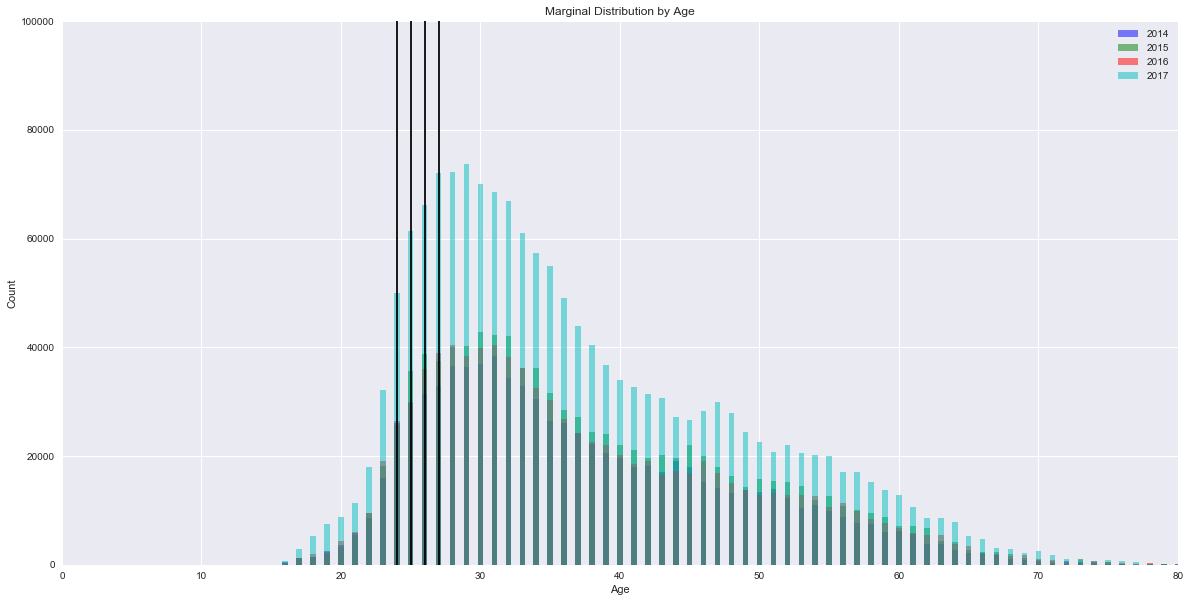

In [161]:
# Marginal Distribution by Age
from cycler import cycler

dfk['age'] = dfk['opyear'].astype(int) - dfk['birth year'].astype(int)

plt.rcParams['axes.prop_cycle'] = cycler(color='bgrcmyk')

plt.figure(figsize=(20,10))
plt.ylim([0,100000])
plt.xlim([0,80])

for year in dfk['opyear'].unique():
    hist_age = np.unique(dfk[dfk['opyear']==year]['age'], return_counts=True)
    plt.bar(hist_age[0], hist_age[1], align='center', width=0.4, alpha=0.5, label=year)
    plt.axvline(year-1990, color='black', alpha=(2014/year))
    
plt.title('Marginal Distribution by Age')
plt.xlabel('Age')
plt.ylabel('Count')

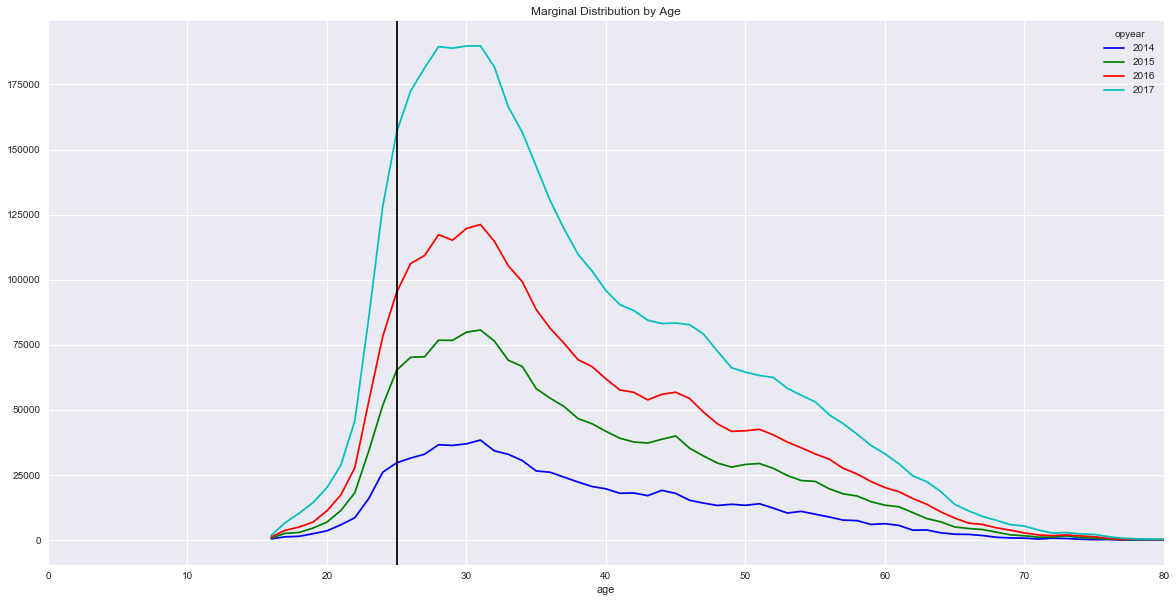

In [158]:
# Marginal Distribution by Age
table2 = dfk.groupby(['opyear','age'])['tripduration'].size().unstack().transpose()
table2.fillna(0,inplace=True)
table2.plot(stacked=True, figsize=(20,10), xlim=(0,80),title='Marginal Distribution by Age')
plt.axvline(25, color='black')


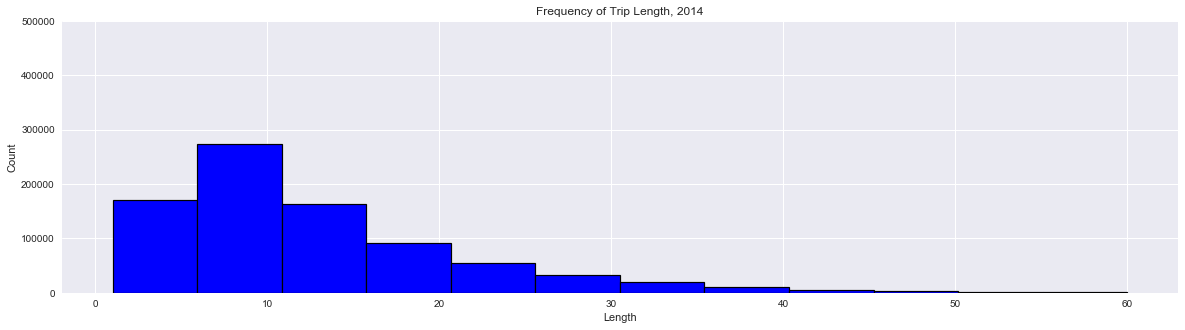

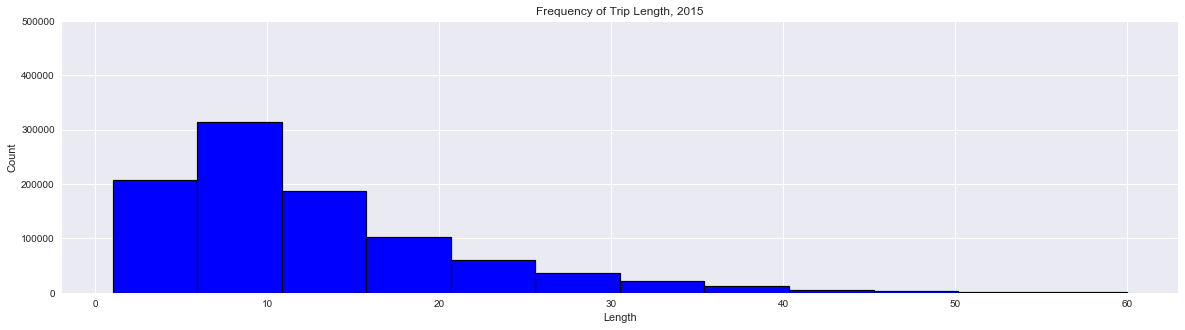

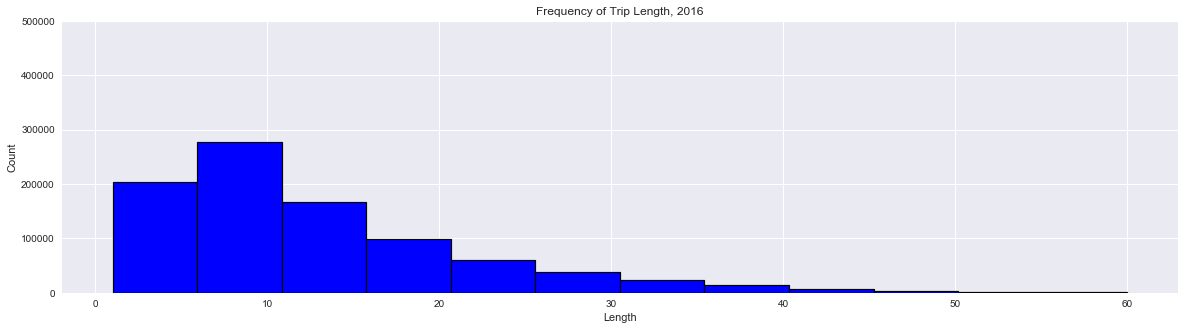

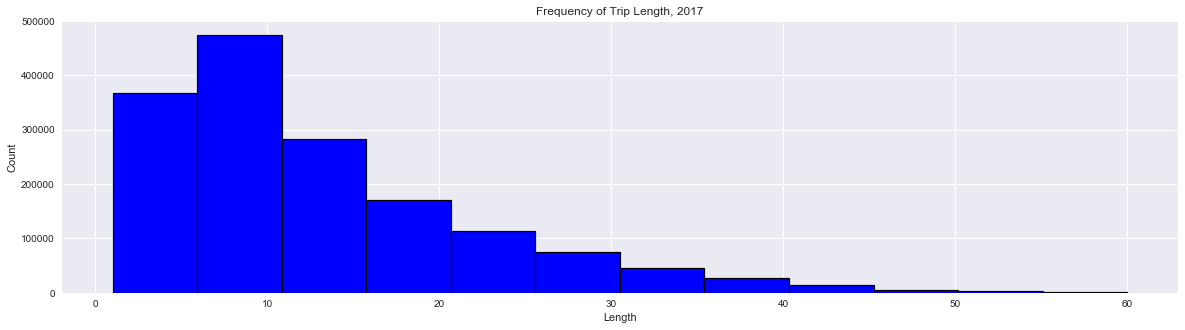

In [171]:
# Frequency by Length, Year
# each bin = 5 min
for year in dfk['opyear'].unique():
    a = dfk[dfk.opyear == year]
    b = a.loc[(a.tripduration <= 60)][['tripduration']]
    b.hist(bins=12, histtype='bar', edgecolor='black', linewidth=1.2, align='mid', figsize=(20,5))
    plt.title('Frequency of Trip Length, %i' %year)    
    plt.xlabel('Length')
    plt.ylim([0,500000])
    plt.ylabel('Count')

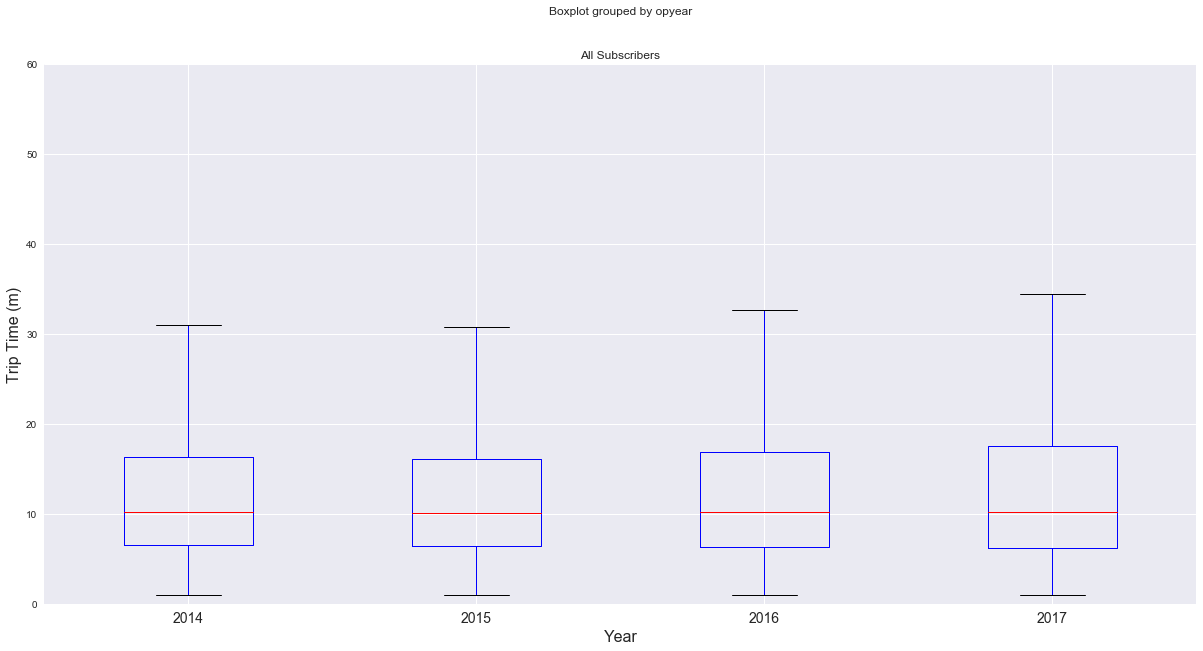

In [21]:
# Box plot of trip duration
bp = dfk.boxplot(column='tripduration', by='opyear', grid=True, figsize=(20,10))
ax = plt.gca()

ax.set_title('All Subscribers')
ax.set_xlabel('Year', fontsize=16)
ax.set_xticklabels(['2014', '2015', '2016', '2017'], fontsize=14)
ax.set_ylabel('Trip Time (m)', fontsize=16)
ax.set_ylim([0,60]) # less than 1 hr

plt.show()

This will explore several subgroups.  

* Subscribers vs customers
* Men vs women (since overall distribution is predominantly male, female will be produced)
* Younger generation (born since 1990)

This will follow the previous two trends.

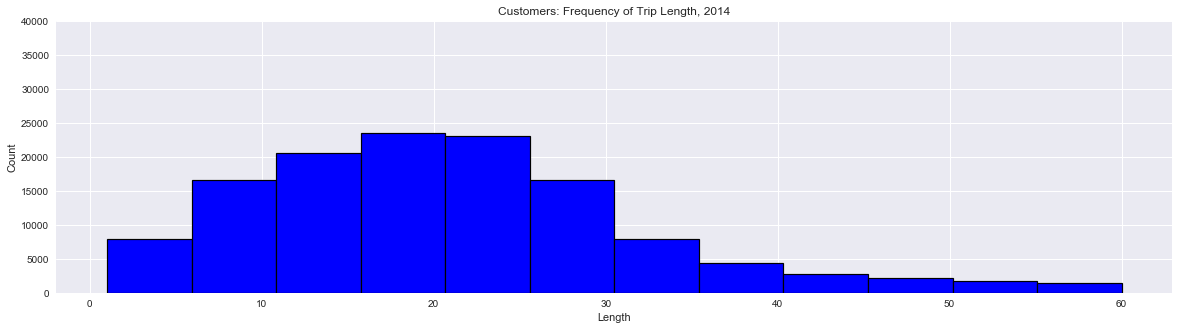

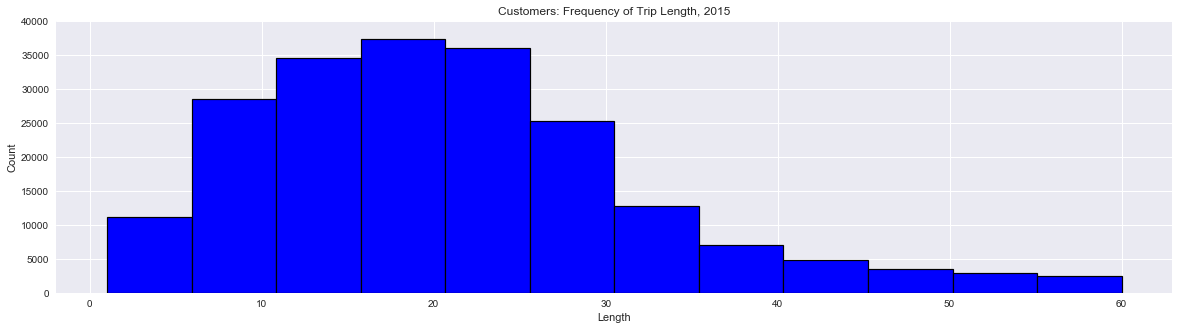

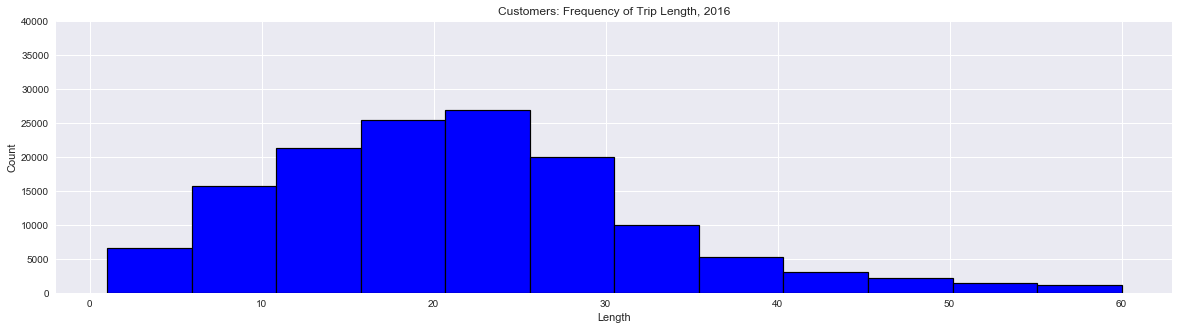

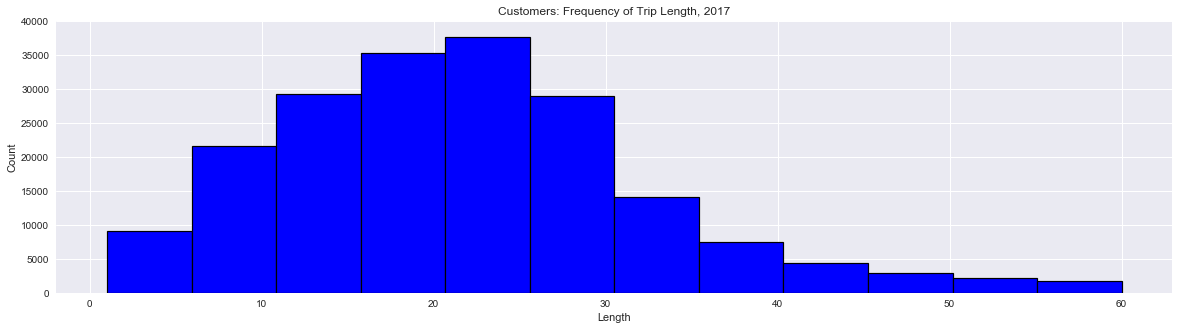

In [173]:
# Unknown Values, Frequency by Length, Year
for year in dfn['opyear'].unique():
    a = dfn[(dfn.opyear == year) & (dfn.usertype=='Customer')]
    b = a.loc[(a.tripduration <= 60)][['tripduration']]
    mu = np.mean(b)
    sigma = np.std(b)
    b.hist(bins=12, histtype='bar', edgecolor='black', linewidth=1.2, align='mid', figsize=(20,5))
    plt.ylim([0,40000])
    plt.title('Customers: Frequency of Trip Length, %i' %year)
    plt.xlabel('Length')
    plt.ylabel('Count')

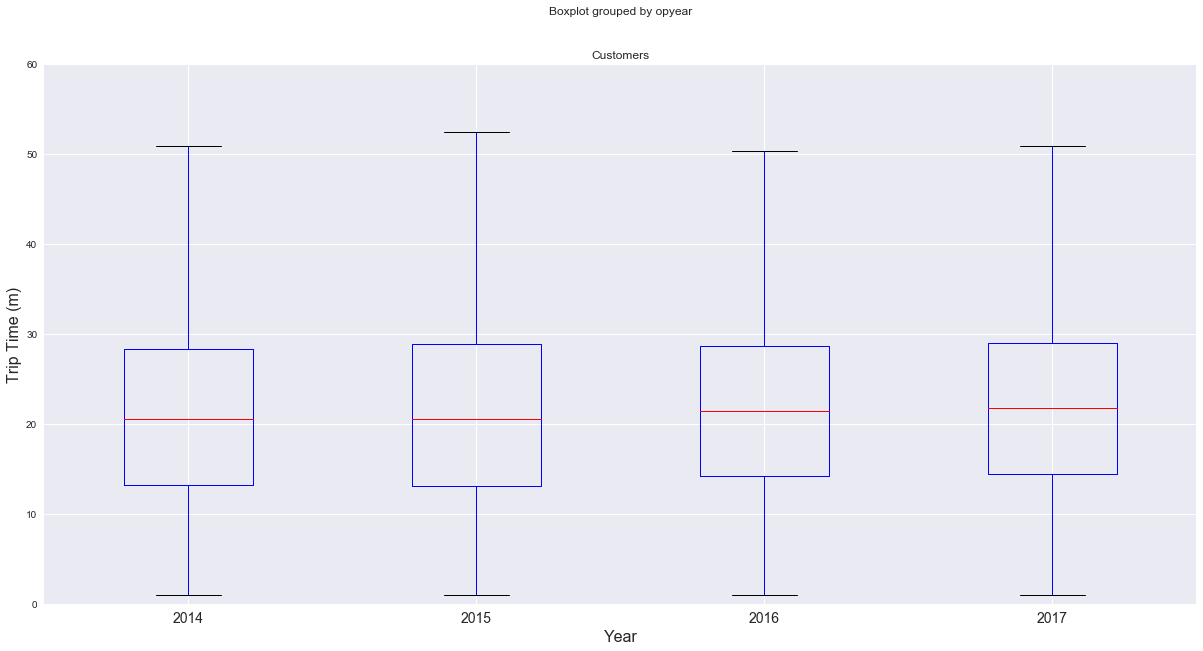

In [32]:
# Box plot of trip duration
bp = dfn[dfn.usertype=='Customer'].boxplot(column='tripduration', by='opyear', grid=True, figsize=(20,10))
ax = plt.gca()

ax.set_title('Customers')
ax.set_xlabel('Year', fontsize=16)
ax.set_xticklabels(['2014', '2015', '2016', '2017'], fontsize=14)
ax.set_ylabel('Trip Time (m)', fontsize=16)
ax.set_ylim([0,60]) # less than 1 hr

plt.show()

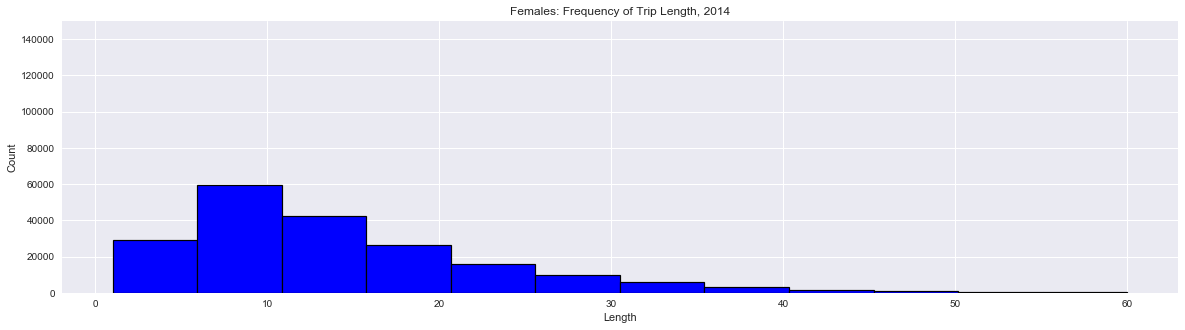

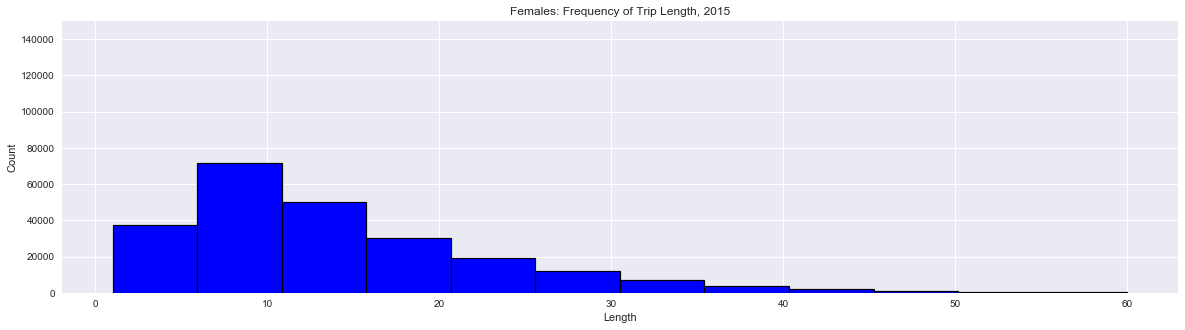

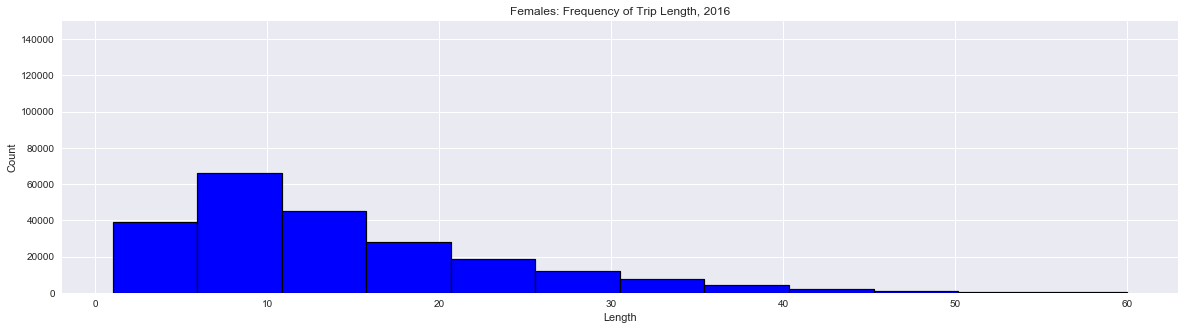

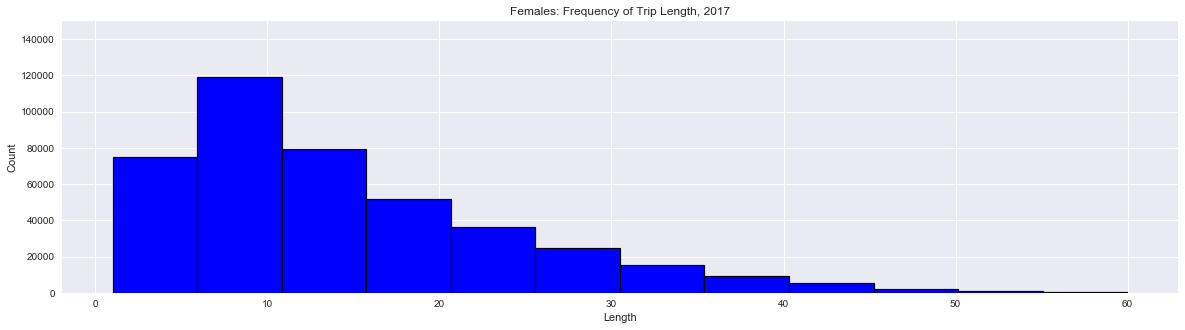

In [176]:
# Females, Frequency by Length, Year
for year in dfk['opyear'].unique():
    a = dfk[(dfk.opyear == year) & (dfk.gender==2)]
    b = a.loc[(a.tripduration <= 60)][['tripduration']]
    b.hist(bins=12, histtype='bar', edgecolor='black', linewidth=1.2, align='mid', figsize=(20,5))
    plt.ylim([0,150000])
    plt.title('Females: Frequency of Trip Length, %i' %year)
    plt.xlabel('Length')
    plt.ylabel('Count')

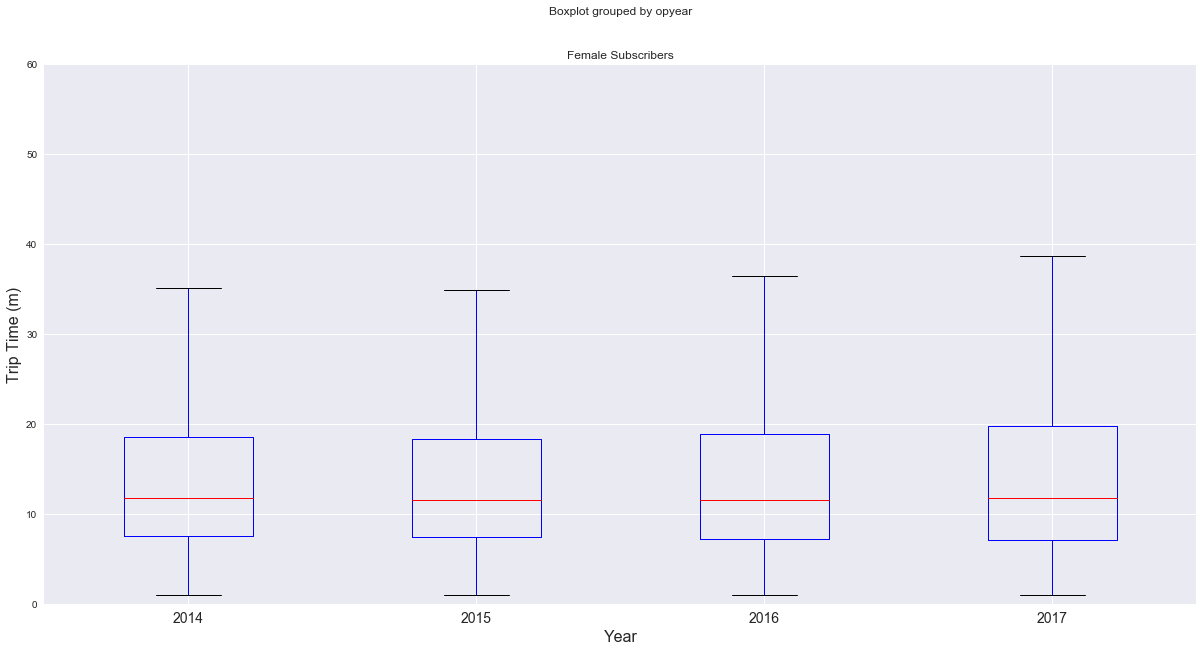

In [34]:
# Box plot of trip duration
bp = dfk[dfk.gender==2].boxplot(column='tripduration', by='opyear', grid=True, figsize=(20,10))
ax = plt.gca()

ax.set_title('Female Subscribers')
ax.set_xlabel('Year', fontsize=16)
ax.set_xticklabels(['2014', '2015', '2016', '2017'], fontsize=14)
ax.set_ylabel('Trip Time (m)', fontsize=16)
ax.set_ylim([0,60]) # less than 1 hr

plt.show()

In [35]:
dfy = dfk[dfk['birth year'].astype(int) >= 1990] # younger generation

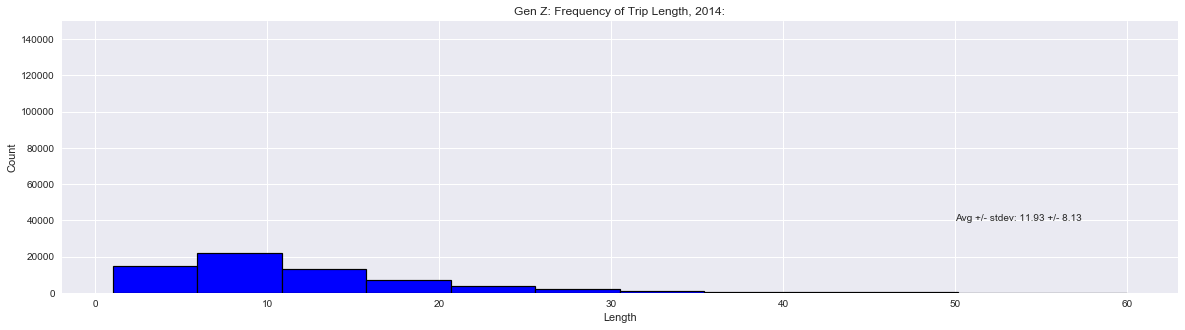

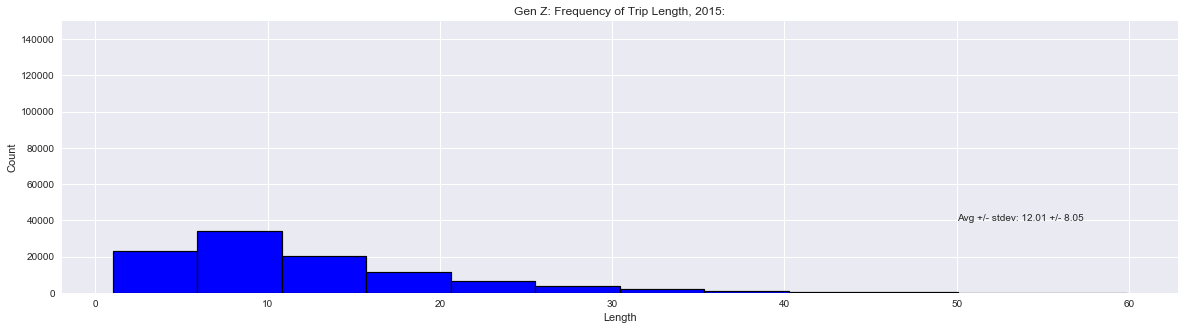

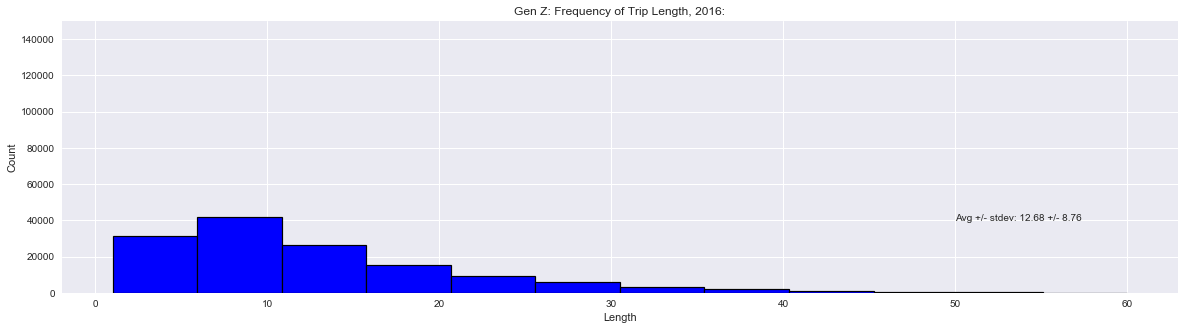

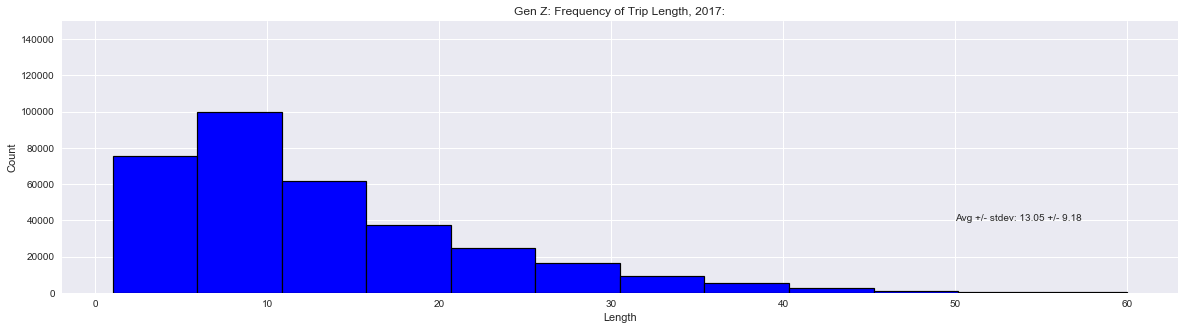

In [180]:
# Younger Generation, Frequency by Length, Year
for year in dfy['opyear'].unique():
    a = dfy[(dfy.opyear == year)]
    b = a.loc[(a.tripduration <= 60)][['tripduration']]
    b_mu = np.mean(b.tripduration)
    b_sig = np.std(b.tripduration)
    b.hist(bins=12, histtype='bar', edgecolor='black', linewidth=1.2, align='mid', figsize=(20,5))
    plt.text(50,40000, 'Avg +/- stdev: %s +/- %s' % (round(b_mu,2), round(b_sig,2)))
    plt.ylim([0,150000])
    plt.title('Gen Z: Frequency of Trip Length, %i:' % year)
    plt.xlabel('Length')
    plt.ylabel('Count')

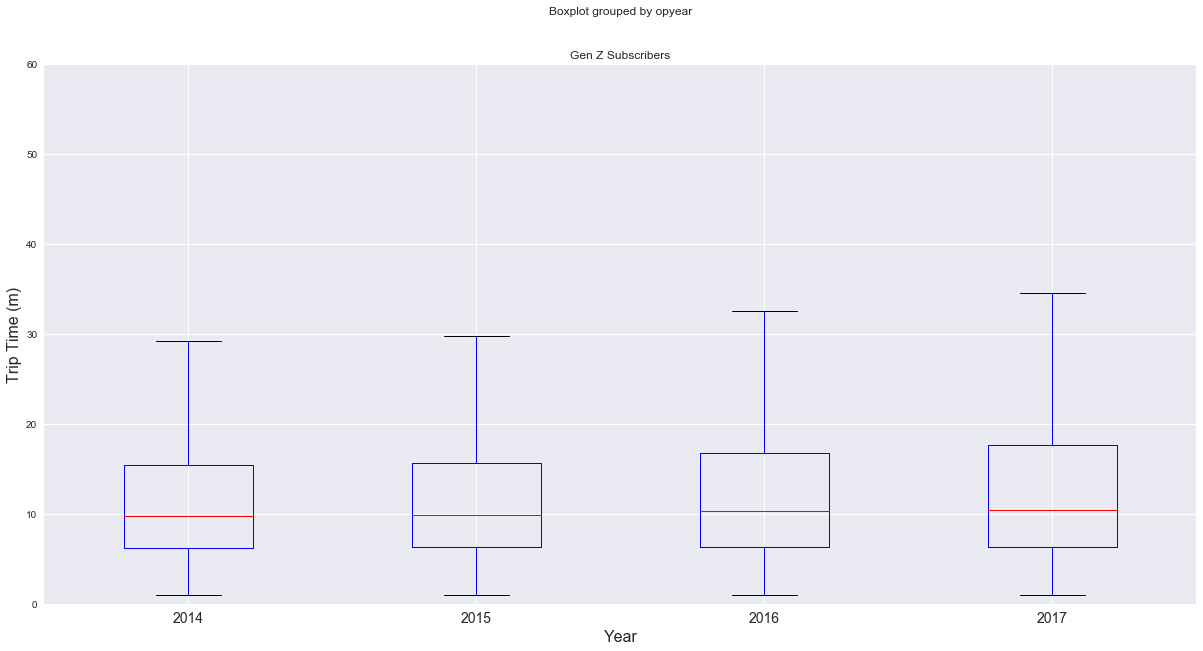

In [37]:
# Box plot of trip duration
bp = dfy.boxplot(column='tripduration', by='opyear', grid=True, figsize=(20,10))
ax = plt.gca()

ax.set_title('Gen Z Subscribers')
ax.set_xlabel('Year', fontsize=16)
ax.set_xticklabels(['2014', '2015', '2016', '2017'], fontsize=14)
ax.set_ylabel('Trip Time (m)', fontsize=16)
ax.set_ylim([0,60]) # less than 1 hr

plt.show()

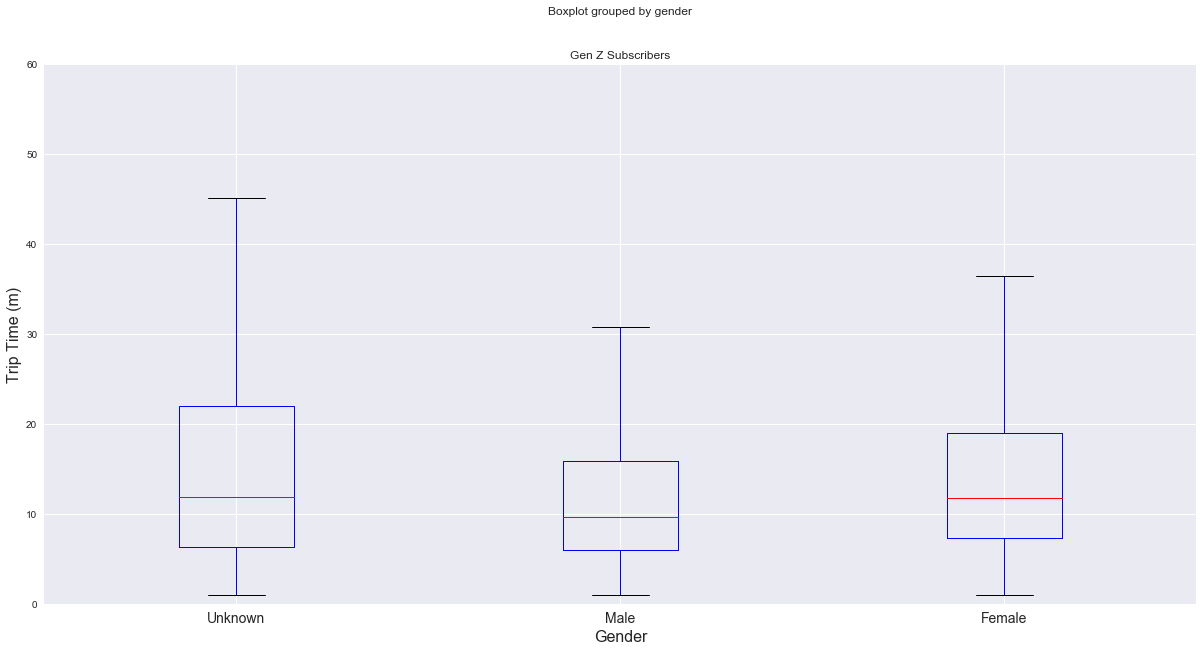

In [38]:
# Box plot of trip duration
bp = dfy.boxplot(column='tripduration', by='gender', grid=True, figsize=(20,10))
ax = plt.gca()

ax.set_title('Gen Z Subscribers')
ax.set_xlabel('Gender', fontsize=16)
ax.set_xticklabels(['Unknown', 'Male', 'Female'], fontsize=14)
ax.set_ylabel('Trip Time (m)', fontsize=16)
ax.set_ylim([0,60]) # less than 1 hr

plt.show()

### inferential

Best to focus more on Generation Z and whether the increase of their trips may cause a need to focus on tailoring to them more.  This is focusing on trip duration, gender activity, and whether the trip length is increasing per year.  

A probable hypothesis test is:

$H_0: \bar{x}_{2017} = \bar{x}_{2016} = \bar{x}_{2015} = \bar{x}_{2014}$

$H_a: \bar{x}_{2017} \neq \bar{x}_{2016} \neq \bar{x}_{2015} \neq \bar{x}_{2014}$

$\bar{x}$ is the mean of the sample for this generation per year.  So $\bar{x}_2017$ is the mean trip duration for generation Z in 2017.  To ensure that the years are producing a recurring theme, assume that the mean will remain the same as the years progress (unlikely but possible).  To reject the null hypothesis means that there is an increase or a decrease.  

However, first, let's create an ECDF for each year and see how they differ from one another.

In [39]:
# FUNCTIONS
# define the ECDF
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""

    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

# Bootstrap replication, one-dimensional
def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

# Bootstrap replication by function
def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

# Difference of Means
def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""

    # The difference of means of data_1, data_2: diff
    diff = np.mean(data_1) - np.mean(data_2)

    return diff

# Permutation sample
def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""

    # Concatenate the data sets: data
    data = np.concatenate((data1, data2))

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2


# Permutation replications
def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)

    return perm_replicates

In [40]:
# Observed Difference of Means
mean_dfy = np.empty(4)
mean_dfy_all = round(np.mean(dfy.tripduration),2)

In [41]:
for year in dfk.opyear.unique():
    mean_dfy[year-2014] = round(np.mean(dfy[dfy.opyear==year].tripduration),2)
    print('Mean trip time, all demo, ', year, ':', round(np.mean(dfk[dfk.opyear==year].tripduration),2), 'min')
    print('Mean trip time, Gen Z, ', year, ':', mean_dfy[year-2014],'min\n')

Mean trip time, all demo,  2014 : 12.95 min
Mean trip time, Gen Z,  2014 : 12.35 min

Mean trip time, all demo,  2015 : 13.74 min
Mean trip time, Gen Z,  2015 : 13.69 min

Mean trip time, all demo,  2016 : 13.86 min
Mean trip time, Gen Z,  2016 : 14.6 min

Mean trip time, all demo,  2017 : 17.53 min
Mean trip time, Gen Z,  2017 : 17.93 min



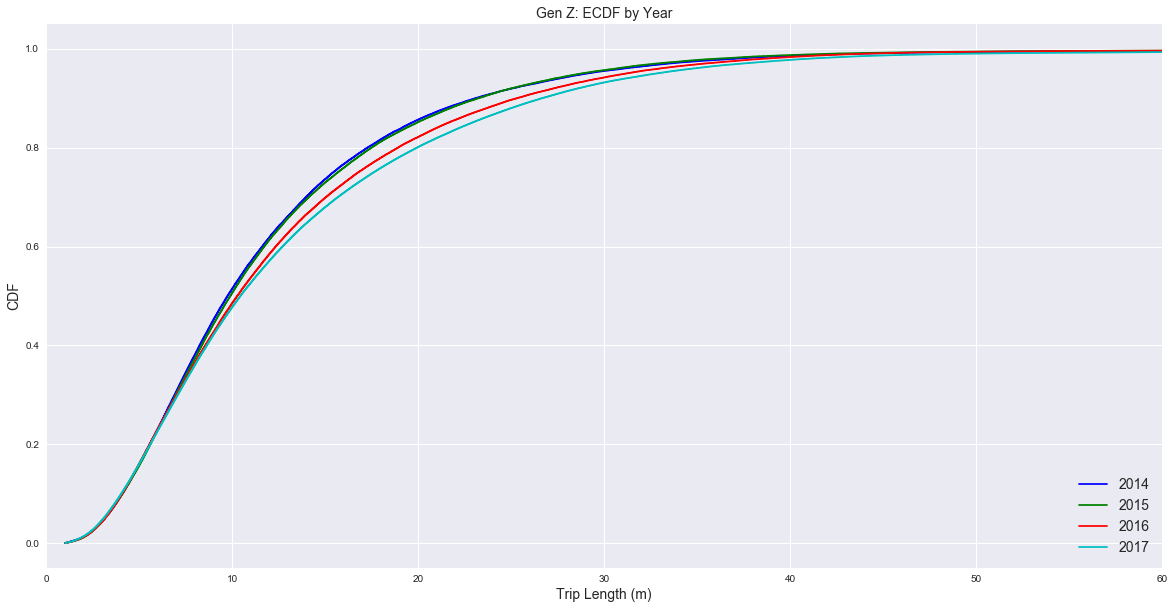

In [42]:
plt.figure(figsize=(20,10))

for year in dfy.opyear.unique():
    x_t, y_t = ecdf(dfy[dfy.opyear == year].tripduration)
    plt.plot(x_t, y_t, label=year)

_ = plt.title('Gen Z: ECDF by Year', fontsize=14)
_ = plt.xlim(0,60)
_ = plt.xlabel('Trip Length (m)', fontsize=14)
_ = plt.ylabel('CDF', fontsize=14)
_ = plt.legend(loc="lower right", labels=dfy.opyear.unique(), fontsize=14)

plt.show()

The best hypothesis is to see whether the trip duration is decreasing from 2014 to 2017, or to see if the trip count is increasing.  The ECDF is showing a rightward shift (at 60% of trips happened within 12 minutes in 2014 while within 13 or 14 minutes in 2017).  

In [43]:
base = dfy[dfy.opyear==2014].tripduration

#### k-s test

In [44]:
# Perform K-S test across yearly subsets vs 2014
for year in dfy.opyear.unique():
    print('Difference of mean,',year,'vs 2014:', diff_of_means(dfy[dfy.opyear==year].tripduration, base))
    print(stats.ks_2samp(base, dfy[dfy.opyear==year].tripduration))
    print('\n')
    
# What about other year comparisons
# baseline 2015
for year in [2016, 2017]:
    print('Difference of mean,',year,'vs 2015:', diff_of_means(dfy[dfy.opyear==year].tripduration, dfy[dfy.opyear==2015].tripduration))
    print(stats.ks_2samp(dfy[dfy.opyear==year].tripduration, dfy[dfy.opyear==2015].tripduration))
    print('\n')

# baseline 2016
print('Difference of mean, 2017 vs 2016:', diff_of_means(dfy[dfy.opyear==2017].tripduration, dfy[dfy.opyear==2016].tripduration))
print(stats.ks_2samp(dfy[dfy.opyear==2017].tripduration, dfy[dfy.opyear==2016].tripduration))
print('\n')

Difference of mean, 2014 vs 2014: 0.0
Ks_2sampResult(statistic=0.0, pvalue=1.0)


Difference of mean, 2015 vs 2014: 1.335409850127979
Ks_2sampResult(statistic=0.009522559627547611, pvalue=0.0013613476331002154)


Difference of mean, 2016 vs 2014: 2.2520061420234967
Ks_2sampResult(statistic=0.038960360128709848, pvalue=4.0974345771074602e-59)


Difference of mean, 2017 vs 2014: 5.58200822836387
Ks_2sampResult(statistic=0.058392582376685431, pvalue=1.8268118379206705e-163)


Difference of mean, 2016 vs 2015: 0.9165962918955177
Ks_2sampResult(statistic=0.032924196816516371, pvalue=5.568726628024285e-56)


Difference of mean, 2017 vs 2015: 4.246598378235891
Ks_2sampResult(statistic=0.053330991571770237, pvalue=9.2046140416786417e-196)


Difference of mean, 2017 vs 2016: 3.3300020863403734
Ks_2sampResult(statistic=0.021199559445285066, pvalue=1.5305568655820776e-38)




#### permutation

In [45]:
# Create 10,000 replications of the difference in mean; we want them 
from decimal import Decimal

# baseline 2014
for year in dfy.opyear.unique():
    perm_replicates = draw_perm_reps(dfy[dfy.opyear==year].tripduration, base, diff_of_means, size=10000)
    p = np.sum(abs(perm_replicates) > diff_of_means(dfy[dfy.opyear==year].tripduration, base)) / len(perm_replicates)
    print('p-val, ',year, 'vs 2014:', '%.2E' % Decimal(p))
    
# baseline 2015
for year in [2016, 2017]:
    # creates 10,000 replications of the difference in mean; we want them 
    perm_replicates = draw_perm_reps(dfy[dfy.opyear==year].tripduration, dfy[dfy.opyear==2015].tripduration, diff_of_means, size=10000)
    p = np.sum(abs(perm_replicates) > diff_of_means(dfy[dfy.opyear==year].tripduration, dfy[dfy.opyear==2015].tripduration)) / len(perm_replicates)
    print('p-val, ',year, 'vs 2015:', '%.2E' % Decimal(p))
    
# baseline 2016
perm_replicates = draw_perm_reps(dfy[dfy.opyear==2017].tripduration, dfy[dfy.opyear==2016].tripduration, diff_of_means, size=10000)
p = np.sum(abs(perm_replicates) > diff_of_means(dfy[dfy.opyear==2017].tripduration, dfy[dfy.opyear==2016].tripduration)) / len(perm_replicates)
print('p-val, ',year, 'vs 2016:', '%.2E' % Decimal(p))

p-val,  2014 vs 2014: 1.00E+00
p-val,  2015 vs 2014: 5.90E-03
p-val,  2016 vs 2014: 5.10E-03
p-val,  2017 vs 2014: 0.00E+00
p-val,  2016 vs 2015: 2.61E-01
p-val,  2017 vs 2015: 1.00E-04
p-val,  2017 vs 2016: 4.00E-04


#### bootstrap (normal)

In [46]:
bs_reps = np.empty((4,10000))

for year in dfy.opyear.unique():
    bs_reps[year-2014] = draw_bs_reps(dfy[dfy.opyear==year].tripduration, np.mean, size=10000)

In [47]:
for year in dfy.opyear.unique():    
    # Compute the difference of the sample means: mean_diff
    mean_diff = mean_dfy[year-2014] - mean_dfy[2014-2014]
    print('Year ',year, 'vs 2014: \nDifference of means =', mean_diff, 'min')

    # Compute samples of difference of means: bs_diff_replicates
    bs_diff_replicates = bs_reps[year-2014] - bs_reps[2014-2014]

    # Compute 95% confidence interval: conf_int
    conf_int = np.percentile(bs_diff_replicates, [2.5, 97.5])
    print('95% confidence interval =', conf_int, 'min \n')

for year in [2016, 2017]:
    # Compute the difference of the sample means: mean_diff
    mean_diff = mean_dfy[year-2014] - mean_dfy[2015-2014]
    print('Year ',year, 'vs 2015: \nDifference of means =',  mean_diff, 'min')

    # Compute samples of difference of means: bs_diff_replicates
    bs_diff_replicates = bs_reps[year-2014] - bs_reps[2015-2014]

    # Compute 95% confidence interval: conf_int
    conf_int = np.percentile(bs_diff_replicates, [2.5, 97.5])
    print('95% confidence interval =', conf_int, 'min \n')

# Compute the difference of the sample means: mean_diff
mean_diff = mean_dfy[year-2014] - mean_dfy[2016-2014]
print('Year ',year, 'vs 2016: \nDifference of means =', mean_diff, 'min')

# Compute samples of difference of means: bs_diff_replicates
bs_diff_replicates = bs_reps[year-2014] - bs_reps[2016-2014]

# Compute 95% confidence interval: conf_int
conf_int = np.percentile(bs_diff_replicates, [2.5, 97.5])
print('95% confidence interval =', conf_int, 'min \n')

Year  2014 vs 2014: 
Difference of means = 0.0 min
95% confidence interval = [ 0.  0.] min 

Year  2015 vs 2014: 
Difference of means = 1.34 min
95% confidence interval = [ 0.58018183  2.33979857] min 

Year  2016 vs 2014: 
Difference of means = 2.25 min
95% confidence interval = [ 1.26518372  3.53985147] min 

Year  2017 vs 2014: 
Difference of means = 5.58 min
95% confidence interval = [ 4.56290604  6.73725122] min 

Year  2016 vs 2015: 
Difference of means = 0.91 min
95% confidence interval = [-0.52857323  2.40078039] min 

Year  2017 vs 2015: 
Difference of means = 4.24 min
95% confidence interval = [ 2.80757711  5.64988988] min 

Year  2017 vs 2016: 
Difference of means = 3.33 min
95% confidence interval = [ 1.68062303  4.88539398] min 



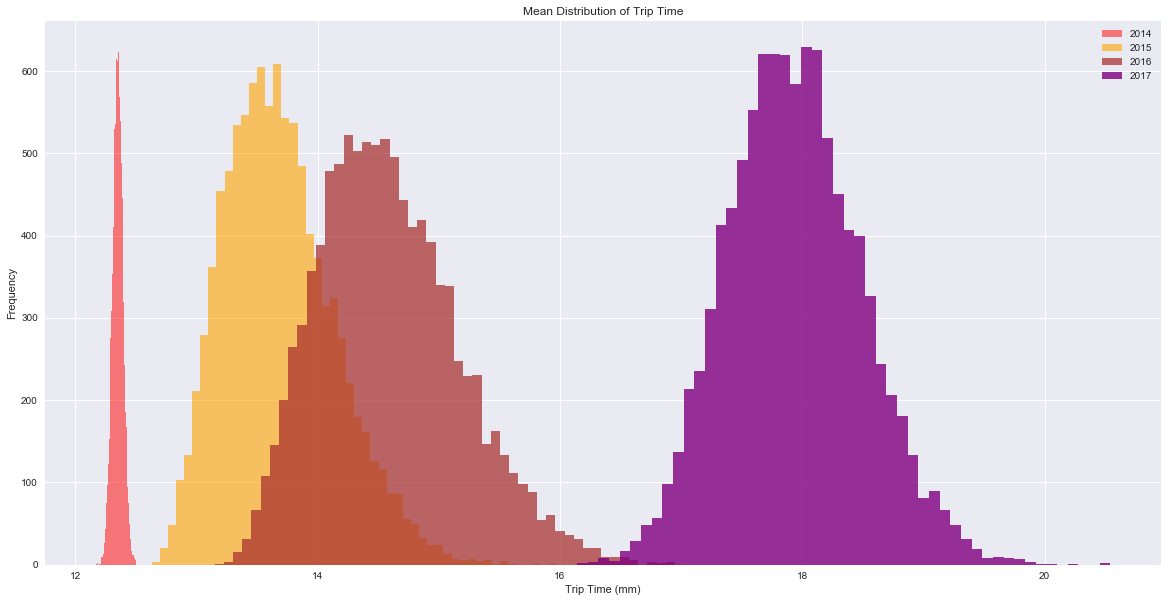

In [55]:
plt.figure(figsize=(20,10))

# Make scatter plot of 1975 data
_ = plt.hist(bs_reps[0], bins=50, color='red', alpha=0.5)
_ = plt.hist(bs_reps[1], bins=50, color='orange', alpha=0.6)
_ = plt.hist(bs_reps[2], bins=50, color='brown', alpha=0.7)
_ = plt.hist(bs_reps[3], bins=50, color='purple', alpha=0.8)


# Label axes and make legend
_ = plt.title('Mean Distribution of Trip Time')
_ = plt.xlabel('Trip Time (mm)')
_ = plt.ylabel('Frequency')
_ = plt.legend(('2014', '2015','2016','2017'), loc='upper right')

# Show the plot
plt.show()

#### bootstrap (shifted)

In [48]:
mean_dfy[2014-2014], mean_dfy[2015-2014]

(12.35, 13.69)

In [49]:
bs_reps_shift = np.empty((4,10000))
for year in dfy.opyear.unique():
    shift_set = dfy[dfy.opyear==year].tripduration - mean_dfy[year-2014] + mean_dfy_all
    bs_reps_shift[year-2014] = draw_bs_reps(shift_set, np.mean, size=10000)

In [50]:
for year in dfy.opyear.unique():    
    # Compute samples of difference of means: bs_diff_replicates
    bs_diff_replicates = bs_reps_shift[year-2014] - bs_reps_shift[2014-2014]

    # Compute 95% confidence interval: conf_int
    conf_int = np.percentile(bs_diff_replicates, [2.5, 97.5])
    print('95% confidence interval 2014 vs',year,'=', conf_int, 'min \n')
    
for year in [2016, 2017]:
    # Compute samples of difference of means: bs_diff_replicates
    bs_diff_replicates = bs_reps_shift[year-2014] - bs_reps_shift[2015-2014]

    # Compute 95% confidence interval: conf_int
    conf_int = np.percentile(bs_diff_replicates, [2.5, 97.5])
    print('95% confidence interval 2015 vs',year,'=', conf_int, 'min \n')
    
# Compute samples of difference of means: bs_diff_replicates
bs_diff_replicates = bs_reps_shift[2017-2014] - bs_reps_shift[2016-2014]

# Compute 95% confidence interval: conf_int
conf_int = np.percentile(bs_diff_replicates, [2.5, 97.5])
print('95% confidence interval 2016 vs 2017 =', conf_int, 'min \n')

95% confidence interval 2014 vs 2014 = [ 0.  0.] min 

95% confidence interval 2014 vs 2015 = [-0.75525385  1.00424978] min 

95% confidence interval 2014 vs 2016 = [-0.97856599  1.29037686] min 

95% confidence interval 2014 vs 2017 = [-1.05515806  1.16122866] min 

95% confidence interval 2015 vs 2016 = [-1.40883539  1.47685973] min 

95% confidence interval 2015 vs 2017 = [-1.39543737  1.41472468] min 

95% confidence interval 2016 vs 2017 = [-1.61738382  1.55843406] min 



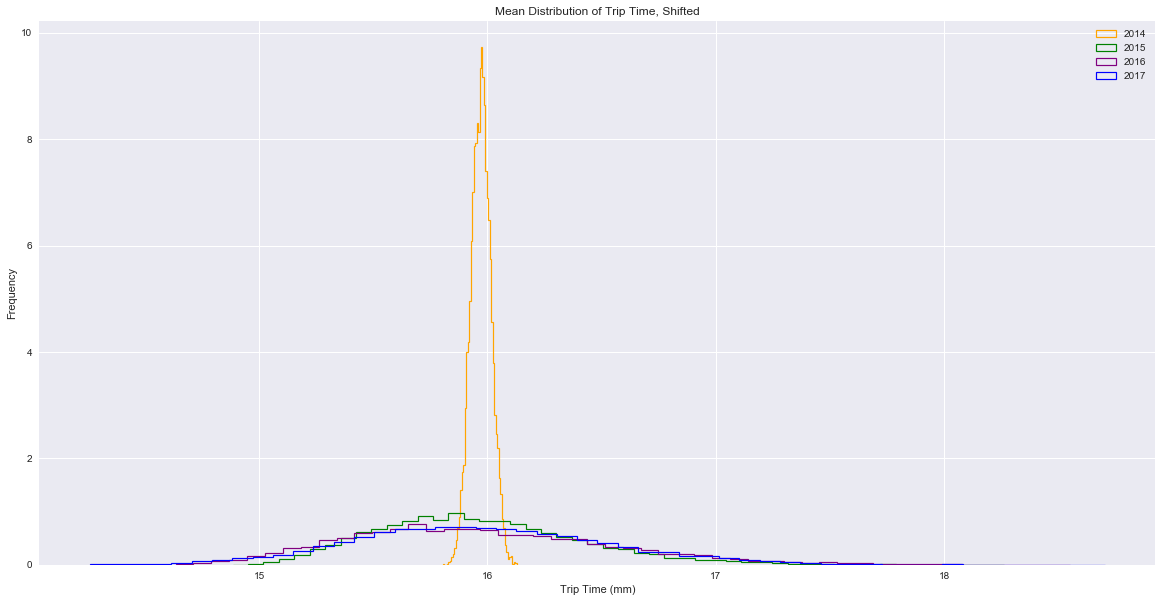

In [181]:
plt.figure(figsize=(20,10))

# Make scatter plot of 1975 data
_ = plt.hist(bs_reps_shift[0], bins=50, normed=1, histtype='step', edgecolor='orange', linewidth=1.2)
_ = plt.hist(bs_reps_shift[1], bins=50, normed=1, histtype='step', edgecolor='green', linewidth=1.2)
_ = plt.hist(bs_reps_shift[2], bins=50, normed=1, histtype='step', edgecolor='purple', linewidth=1.2)
_ = plt.hist(bs_reps_shift[3], bins=50, normed=1, histtype='step', edgecolor='blue', linewidth=1.2)


# Label axes and make legend
_ = plt.title('Mean Distribution of Trip Time, Shifted')
_ = plt.xlabel('Trip Time (mm)')
_ = plt.ylabel('Frequency')
_ = plt.legend(('2014', '2015','2016','2017'), loc='upper right')

# Show the plot
plt.show()

### investigate
As an added bonus, this shows a trend of the increase that Gen Z are using the cycles year by year.  

In [61]:
dfyo = dfy[dfy.tripduration >= 45]

print('IQR \t YEAR \t SIZE n \t SIZE n (>= 45 min) \t INTERQUARTILE RANGE')
for year in dfy.opyear.unique():
    if (year == 2014):
                print('IQR \t',year,'\t', len(dfy[dfy.opyear==year].tripduration),'\t\t', len(dfyo[dfyo['opyear']==year].tripduration),'\t\t\t',np.percentile(dfyo[dfyo.opyear==year].tripduration, [50,75]), ' min')
    else:
        print('IQR \t',year,'\t', len(dfy[dfy.opyear==year].tripduration),'\t', len(dfyo[dfyo['opyear']==year].tripduration),'\t\t\t', np.percentile(dfyo[dfyo.opyear==year].tripduration, [50,75]), ' min')
    
# small but worth investigating

IQR 	 YEAR 	 SIZE n 	 SIZE n (>= 45 min) 	 INTERQUARTILE RANGE
IQR 	 2014 	 65735 		 582 			 [ 57.6     84.5675]  min
IQR 	 2015 	 103234 	 791 			 [ 57.18  90.  ]  min
IQR 	 2016 	 137398 	 1205 			 [ 54.77  78.07]  min
IQR 	 2017 	 336570 	 4471 			 [ 59.02  99.81]  min
